

*Ingeniería Electrónica*

##     <u>**Actividad Práctica N°1**</u>

##      **Representación de sistemas y controladores**




###      **Sistema de Control II**
###     **2025**



###     **Profesor: Julian Pucheta**
###     **Alumna: Macarena V. González**
# <span style="color:rgb(213,80,0)">**Caso de estudio 1: Sistema de dos variables de estado**</span>

&nbsp;&nbsp;&nbsp;&nbsp; Para este caso de estudio se plantea un sistema eléctrico RLC cuyo  comportamiento se encuentra modelado en variables de estado, este modelo puede  obtenerse a partir de las ecuaciones diferenciales que surgen de la aplicación directa de  la ley de Kirchhoff de las tensiones a la malla del circuito.


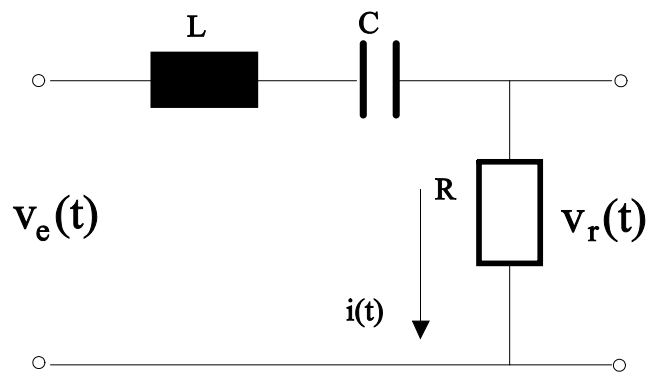


Fig: Esquemático del circuito RLC


$$\begin{array}{l} V_e \left(t\right)=V_L \left(t\right)+V_c \left(t\right)+V_r \left(t\right)\newline V_e \left(t\right)=L\frac{\textrm{di}\left(t\right)}{\textrm{dt}}+V_c \left(t\right)+\textrm{Ri}\left(t\right)\newline \textrm{donde}\;\;\;\;V_c \left(t\right)=\frac{1}{C}\int i\left(t\right)\textrm{dt}\newline {V_o \left(t\right)=V}_r \left(t\right)=\textrm{Ri}\left(t\right) \end{array}$$
### <u>\- Datos proporcionados del sistema eléctrico</u>

####       1)Representaciones de variables de estado:

$$\dot{x} =\textrm{Ax}\left(t\right)+\textrm{Bu}\left(t\right)$$

$$y=c^T x\left(t\right)$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Donde las matrices contienen a los coeficientes del circuito:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $A=\left\lbrack \begin{array}{cc} -\frac{R}{L} & -\frac{1}{L}\newline \frac{1}{C} & 0 \end{array}\right\rbrack$ , $B=\left\lbrack \begin{array}{c} \frac{1}{L}\newline 0 \end{array}\right\rbrack$ , $c^T =\left\lbrack \begin{array}{cc} R & 0 \end{array}\right\rbrack$


Con estos datos  y las ecuaciones diferenciales se puede definir como variables de estado  a :


$$\begin{array}{l} x_1 =i\left(t\right)\;\newline \;x_2 =V_c \left(t\right)\; \end{array}$$

Despejando, ordenando y reemplazando obtenemos:


$$\begin{array}{l} \dot{x_1 } =-\frac{R}{L}x_1 -\frac{1}{L}x_2 +\frac{1}{L}V_e \newline \dot{x_2 } =\frac{1}{C}x_1 \newline y={R\ldotp x}_1  \end{array}$$

Integrando todo :

 $ $ \begin{array}{l} \left\lbrack \begin{array}{c} \dot{x_1 } \newline \dot{x_2 }  \end{array}\right\rbrack =\left\lbrack \begin{array}{cc} -\frac{R}{L} & -\frac{1}{L}\newline \frac{1}{C} & 0 \end{array}\right\rbrack \left\lbrack \begin{array}{c} x_1 \newline x_2  \end{array}\right\rbrack +\left\lbrack \begin{array}{c} \frac{1}{L}\newline 0 \end{array}\right\rbrack V_e \\
\;\;\;\;\;\;\;y=\left\lbrack \begin{array}{cc} R & 0 \end{array}\right\rbrack \ldotp \left\lbrack \begin{array}{c} x_1 \newline x_2  \end{array}\right\rbrack
\end{array} $ $

####         2)Curvas del circuito RLC para una entrada de 12V:

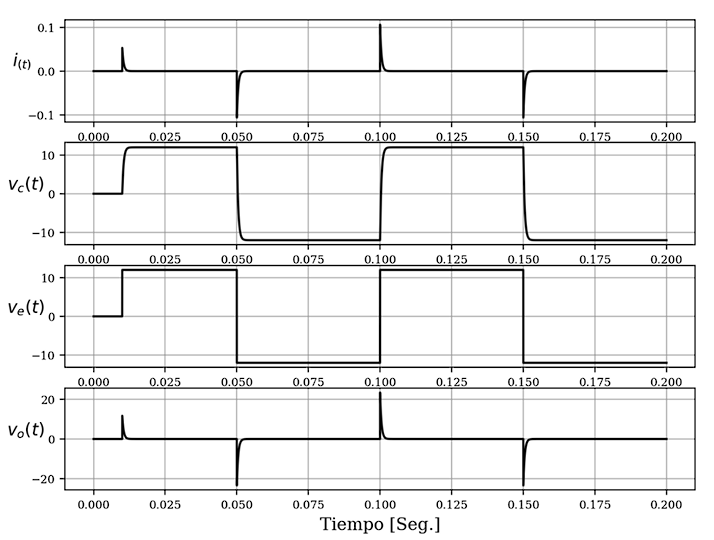


### Consignas a resolver →(ítems)
#### Ítem\[1\]

&nbsp;&nbsp;&nbsp;&nbsp; Asignar valores a R=220Ω , L=500mHy, y C=2,2μF. Obtener simulaciones que permitan  estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V, que cada  1ms cambia  de signo.

### <u>Resolución</u>

 Para estudiar la dinámica del sistema se procede a realizar los siguientes pasos:


In [1]:
clear all; clc; close all;


-  Declarar los Parámetros  de diseño y  matrices que forman las ecuaciones de estados  :

In [2]:
R= 220;

R = 220

In [3]:
L= 500e-3;

L = 0.5000

In [4]:
Cap= 2.2e-6;

Cap = 2.2000e-06

In [5]:
V_e = 12;% voltaje de entrada

V_e = 12

In [6]:
%Matrices del espacio
A= [-R/L -1/L ; 1/Cap 0]; % Matriz de estados

A = 2x2
1.0e+05 *
   -0.0044   -0.0000
    4.5455         0

In [7]:
B= [1/L ; 0]; %Matriz de entrada

B = 2x1
     2
     0

In [8]:
C= [R 0]; %Matriz de salida

C = 1x2
   220     0

In [9]:
D=[0]; %Matriz de transmisión directa

D = 0


-  También es importante declarar el punto de operación,es necesario para encontrar las ecuaciones de estado:

In [10]:
%Punto de operación de V y I
I1(1)=0;

I1 = 0

In [11]:
Vc(1)=0;

Vc = 0

In [12]:
y(1)=0;

y = 0

In [13]:
Xop=[0 0]' ;

Xop = 2x1
     0
     0

In [14]:
x=[I1(1) Vc(1)]';

x = 2x1
     0
     0


-  Obtener  la FT a partir de las matrices del espacio de estado → me sirve para calcular los polos  y por ende el comportamiento de estabilidad del sistema y los tiempos de simulación

In [15]:

%convierte de espacio de estados a función de transferencia
[numF,denF] = ss2tf(A,B,C,D)

numF = 1x3
     0   440     0
denF = 1x3
1.0e+05 *
    0.0000    0.0044    9.0909

In [16]:
%Función de transferencia del sistema
F=tf(numF,denF)

F =
 
          440 s
  ----------------------
  s^2 + 440 s + 9.091e05
 
Continuous-time transfer function.
Model Properties

In [17]:
%Polos de la FT
poles=roots(denF) % POLOS complejos conjugados :representan una respuesta temp SUBamortiguada en el tiempo 0<ξ<1

poles = 2x1 complex
1.0e+02 *
  -2.2000 + 9.2773i
  -2.2000 - 9.2773i

In [18]:

% saco la parte imaginaria del polo = Wd
Wd1=imag(poles(1))

Wd1 = 927.7343

In [19]:
Wd2= imag(poles(2))

Wd2 = -927.7343

In [20]:
%Proporciona ξ y Wn de la FT
[Wn,zita]=damp(F)

Wn = 2x1
  953.4626
  953.4626
zita = 2x1
    0.2307
    0.2307

In [21]:
%damp(F) me proporciona mas información


  Como los polos son complejos conjugados, representan una respuesta temp. <u>**sub**</u>amortiguada en el tiempo **<samp>0<ξ<1</samp>** ,  para calcular los tiempos de simulación y de paso se debe considerar la ***frecuencia de oscilación***  $W_d$ (parte imaginaria de los polos).


   \- Para estimar el  tamaño de paso que permita observar una dinámica  más rápida  se utiliza el polo  que coincide con el 95% de la dinámica.


&nbsp;&nbsp;&nbsp;&nbsp; \-Al considerar una dinámica rápida el tiempo de integración debería ser aprox  10 veces menor que el tiempo de paso


In [22]:
%Cálculo de Período de Wd1
t_d=(2*pi)/Wd1

t_d = 0.0068

In [23]:
%time de integración
t_int=t_d/10

t_int = 6.7726e-04

In [24]:
%----


Para el tiempo de simulación se toma la constante de tiempo más lenta p/ 5% :


In [25]:
t_l=log(0.05)/(real(poles(1)))

t_l = 0.0136

In [26]:
t_sim=3*t_l

t_sim = 0.0409


Como  se pide una simulación con una entrada que cambie de signo cada 10 ms entonces Tsim debe ser mayor lo cua se cumple ya que nos da  $t_{\textrm{sim}} =0\ldotp 0409$


 <samp>El tamaño de paso o "step" esta definido por:</samp>


In [27]:
step=round(t_sim/t_int) %cant. de puntos de sim.= time total de simu/time que dura cada tamaño de paso

step = 60


Sabiendo la cantidad de puntos  necesarios se contruye el vector tiempo :


In [28]:
t=linspace(0,t_sim,step);


Con el vector tiempo  y   el punto de operación se puede definir la señal de entrada:


In [29]:
%vector inicial de la entrada

t = linspace(0, t_sim, step);

u=linspace(0,0,step);

ii=0;

for i=1:step-1
    ii = ii + t_int;
    if(ii >= 10e-3) %porque conmuta cada 10 milisegundo
        ii=0;
        V_e=V_e*-1;

    end
    u(i)= V_e;

    %Variables de estado del sistema lineal
    xp=A*(x-Xop)+B*u(i);
    x=x+xp*t_int;
    Y=C*x;
    y(i+1)=Y(1);
    I1(i+1)=x(1);
    Vc(i+1)=x(2);
end
u(end)=u(end-1);

u = 1x60
    12    12    12    12    12    12    12    12    12    12    12    12    12    12   -12   -12   -12   -12   -12   -12   -12   -12   -12   -12   -12   -12   -12   -12   -12    12    12    12    12    12    12    12    12    12    12    12    12    12    12    12   -12   -12   -12   -12   -12   -12


Gráficas


In [30]:
disp('Simulación completada')

Simulación completada

In [31]:

figure(1)
subplot(3,1,1)
plot(t,u,'green','LineWidth',2); title('Tension de entrada , u_t')
grid on
subplot(3,1,2)
plot(t,Vc,'blue','LineWidth',2); title('Tension en el capacitor, Vc_t')
grid on
subplot(3,1,3);
plot(t,I1,'red','LineWidth',2); title('Corriente , i_t');
grid on;
drawnow;
disp("¡Simulación finalizada! Revisa la figura generada.")

¡Simulación finalizada! Revisa la figura generada.